<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.401 · Programming Fundamentals</p>
    <p style="margin: 0; text-align:right;">Master's Degree in Data Science</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Programming Fundamentals
============================

In this notebook, some relevant aspects of data analysis are introduced (KNeighbour, PCA, decision tree, t-test, linear regression, etc.)  

## Exercice 1

Describe the purpose of each step in the following code fragment:

import numpy as np <br>
data = np.vstack([ages, weight, children, gross, properties ]).T <br>
<br>
data_normalised = (data - data.mean(axis=0) )/ data.std(axis=0) <br>
<br>
pca = PCA(n_components=2) <br>
pca.fit(data_normalised) <br>
print(pca.explained_variance_ratio_) <br>
print(pca.singular_values_) <br>
<br>
transformed_data = pca.transform(data_normalised) <br>
<br>
plt.scatter( transformed_data[:,0], transformed_data[:,1], c=corporative_job, cmap='jet') <br>
plt.xlabel('PCA 1') <br>
plt.ylabel('PCA 2') <br>

**Answer**

- Reorganize the data structure: <br>
data = np.vstack([ages, weight, children, gross, properties ]).T <br>
<br>
- Normalize the data: <br>
data_normalised = (data - data.mean(axis=0) )/ data.std(axis=0) <br>
<br>
- Create a PCA object that extracts the 2 principal components of the variance: <br>
pca = PCA(n_components=2) <br>
<br>
- Fit the model: <br>
pca.fit(data_normalised) <br>
<br>
- Prints on screen the variability explained by the model compononents: <br>
print(pca.explained_variance_ratio_) <br>
<br>
- Reduce the dimensionality of the data: <br>
transformed_data = pca.transform(data_normalised) <br>
<br>
- Create a scatter plot to evaluate the transformation: <br>
plt.scatter( transformed_data[:,0], transformed_data[:,1], c=corporative_job, cmap='jet') <br>
plt.xlabel('PCA 1') <br>
plt.ylabel('PCA 2') <br>

## Exercice 2

Load the [diabetis](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) dataset from the library `sklearn`. The records of this file contain the different characteristics of diabetes patients and their diagnosis. In this case, the `target` variable is a quantitative measure of the diabetes progression one year after the onset of the disease. 

**2.1)** Create a dataframe that includes a *progression* column which contains the diabetes progression. The rest of the variables' names correspond to the `feature_names`.

**2.2)** Create a dataframe that contains all variables' descriptive statistics grouped by: severe deterioration (progression of diabetes above the average) or moderate deterioration (progression of diabetes below or equal the average). Descriptive statistics should include mean, standard deviation, minimum, maximum, median, 25th percentile, and 75th percentile.

**2.3)** Once this is done, graph the `age` and `bmi` by type of impairment (severe or moderate) using a bar chart that represents the mean and, as error bars, the [standard error](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sem.html).

**2.4)** Explore the documentation of [Diabetes dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) and explain why the age values are so small. 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import datasets

### 2.1

#Load and create dataframe
diabetes_data = datasets.load_diabetes()
diabetes_data_df = pd.DataFrame(data=diabetes_data['data'], columns=diabetes_data['feature_names'])
diabetes_data_df['progresion'] =  diabetes_data['target']
diabetes_data_df.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progresion
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0


In [34]:
### 2.2
import warnings
warnings.filterwarnings('ignore')

# Create empty string column
diabetes_data_df['deterioro'] = ""

# Add severe and moderate
index_severo = diabetes_data_df[ diabetes_data_df['progresion'] > diabetes_data_df['progresion'].mean() ].index
diabetes_data_df['deterioro'].iloc[index_severo] =  'severe'

index_moderado = diabetes_data_df[ diabetes_data_df['progresion'] <= diabetes_data_df['progresion'].mean() ].index
diabetes_data_df['deterioro'].iloc[index_moderado] = 'moderate'

## Ara mostra els estadístics descriptius per a totes les categories
diabetes_data_df.groupby('deterioro').describe()

age                                                              \
           count      mean       std       min       25%       50%       75%   
deterioro                                                                      
moderate   247.0 -0.006779  0.047735 -0.107226 -0.041840 -0.001882  0.027178   
severe     195.0  0.008587  0.046180 -0.107226 -0.025494  0.012648  0.043525   

                       sex            ...        s6           progresion  \
                max  count      mean  ...       75%       max      count   
deterioro                             ...                                  
moderate   0.092564  247.0 -0.001033  ...  0.015491  0.106617      247.0   
severe     0.110727  195.0  0.001308  ...  0.044485  0.135612      195.0   

                                                                     
                 mean        std    min    25%    50%    75%    max  
deterioro                                                            
moderate    93.291498  32.269131   25.0   67.0   91.0  121.0  152.0  
severe     226.666667  46.881037  153.0  185.0  220.0  263.0  346.0  

[2 rows x 88 columns]

In [4]:
diabetes_data_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progresion,deterioro
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,moderate
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,moderate
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,moderate
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,severe
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,moderate


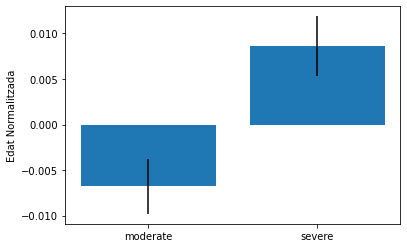

Text(0, 0.5, 'BMI Normalitzat')

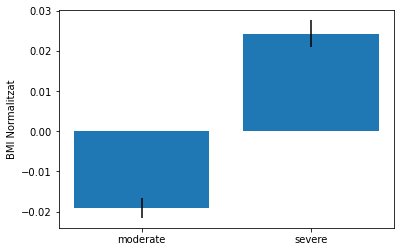

In [5]:
### 2.3)
plt.figure()
plt.bar(['moderate','severe'], diabetes_data_df.groupby('deterioro').mean()['age'],
                yerr=diabetes_data_df.groupby('deterioro').sem()['age'])
plt.ylabel("Edat Normalitzada")

plt.show()
plt.bar(['moderate','severe'], diabetes_data_df.groupby('deterioro').mean()['bmi'],
                yerr=diabetes_data_df.groupby('deterioro').sem()['bmi'])
plt.ylabel("BMI Normalitzat")


**2.4) Answer**

The age values are so small because they have been normalized. The numerical values have been transformed to be centered on the mean and scaled by the standard deviation (i.e. the sum of the squares in each data column sum 1).

## Exercice 3

Now that the dataset is organized, plot the distribution of "age", "gender", and "bmi" features. To do so, you can use histograms or [violin diagram from the matplotlib library](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.axes.Axes.violinplot.html). In addition, show a single figure with one subplot for each variable.

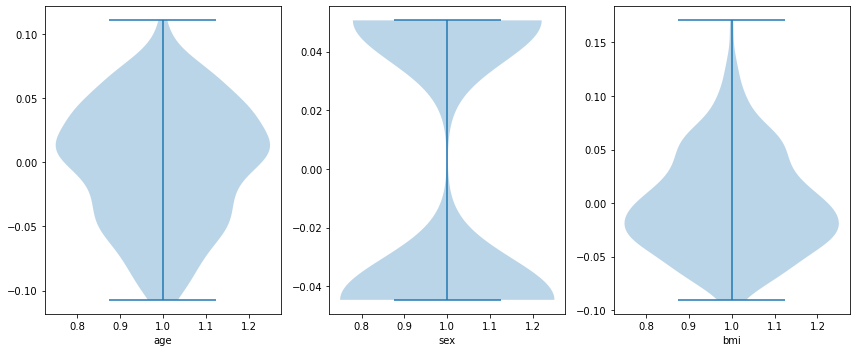

In [6]:
features = ["age","sex","bmi"]
n_features = len(features)

nc = n_features
nr = 1

fig,ax = plt.subplots( nrows=nr, ncols=nc, figsize=(12,5), facecolor='w')

for feat in range(n_features):    
    this_feature = features[feat]
    plt.sca(ax[feat])
    plt.violinplot(diabetes_data_df[this_feature])
    plt.xlabel(this_feature)
    
plt.tight_layout()


## Exercice 4

Considering this dataset, a hospital wants to know which characteristics might be the most relevant factors for poor recovery in diabetes patients.

**1)** The correlation allows us to study the relationship between two variables, and Pandas offers a function to calculate correlations easily with the method [`corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). This function graphically represents in a [correlation matrix or correlogram](https://es.wikipedia.org/wiki/Matriz_de_correlaci%C3%B3n) the correlation between the diabetes patient's features, as well as their correlation with the target variable. Consulting the correlogram, which are the three most relevant features for the progression of the disease? Justify the answer. 


**2)** Would it be possible to use an **unsupervised** data analysis technique to solve this problem? Why?

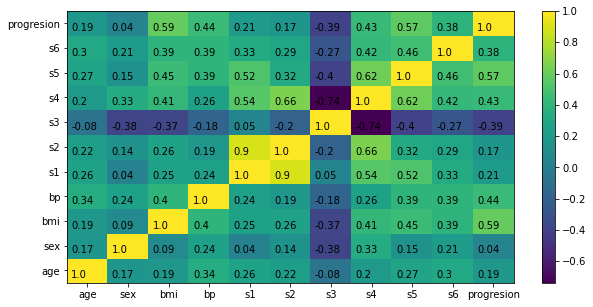

In [7]:
# 4.1)
import numpy as np

corr = diabetes_data_df.corr()
corr_labels = np.around( corr.to_numpy(), 2)
        
plt.figure(figsize=(10,5))
plt.pcolor(corr)

for ii in range(corr_labels.shape[0]):
    for jj in range(corr_labels.shape[1]):
        plt.text( ii+0.1, jj+0.2, corr_labels[ii,jj] )

plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
plt.colorbar() 

**4.1**

The three characteristics that show the highest correlation with diabetes progression are BMI, S5 marker, and BP, in that order of relevance. Therefore, these are the variables that are most closely related to the disease progression. 

**4.2**

In this case, our goal is to predict the progression of the disease, thus, a supervised method is mandatory to train the model according to the progression target. If the goal is to group patients into *clusters* to later predict their progression according to assumptions, it is possible to use unsupervised methods, such as the *Main Component Analysis*.

## Exercice 5

In this exercise, you will need to apply multiple linear regression to construct a predictive model of impairment in diabetes patients based on the characteristics of the data set.

- First of all, divide the data into training and evaluation sets, with a test sample size of 33%.
 
- Then, train the model with the training data and calculate the accuracy of the model. Write a brief explanation of what it means to get such accuracy.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = diabetes_data_df['progresion']
X = diabetes_data_df.drop('deterioro', axis=1)
X = X.drop('progresion', axis=1)

## Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Train model
clf = LinearRegression().fit(X_train, y_train)

precision =  clf.score(X_test, y_test)
print( "The precision is : {0}".format(precision)  )

The precision is : 0.5111002387854824


**Answer**

The multiple linear regression model has an accuracy of 50%. This means that a 50% of the records in the test set are correctly estimated.

## Exercice 6

Use a statistical test [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to answer the following question: Men diagnosed with diabetes are more likely to deterioration than women?

- Null hypothesis: Men diagnosed with diabetes do not have a different deterioration trend than women.

- Alternative hypothesis: Men diagnosed with diabetes have a different tendency to deteriorate than women.

Once done, interpret the resulting values and extract a conclusion.

In [35]:
# New categorical sex column
diabetes_data_df['sex_label'] = ""

index_severo = diabetes_data_df[ diabetes_data_df['sex'] > 0].index
diabetes_data_df['sex_label'].iloc[index_severo] =  'Woman'

index_moderado = diabetes_data_df[ diabetes_data_df['sex'] < 0 ].index
diabetes_data_df['sex_label'].iloc[index_moderado] = 'Men'


([<matplotlib.axis.XTick at 0x23f89ecffd0>,
 [Text(1, 0, 'Woman'), Text(2, 0, 'Men')])

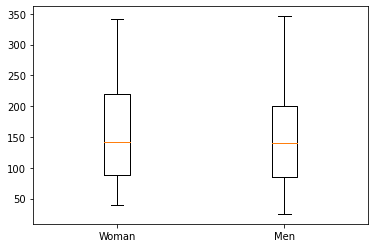

In [21]:
# Both sexes boxplots seem to be very similar

plt.boxplot([diabetes_data_df[
    diabetes_data_df['sex_label']=='Woman']['progresion'], 

diabetes_data_df[diabetes_data_df['sex_label']=='Men']['progresion']] )

plt.xticks([1,2], ['Woman','Men'])

In [22]:
# t-test
from scipy import stats

groups = diabetes_data_df.groupby('sex_label').groups

stats.ttest_ind(diabetes_data_df.iloc[groups['Woman']]['progresion'], 
                diabetes_data_df.iloc[groups['Men']]['progresion'])

Ttest_indResult(statistic=0.9041147550244715, pvalue=0.3664292946519826)

**Answer**

There are no significative differences between both sexes (p > 0.05). Therefore, the null hypothesis cannot be rejected and we can conclude that there is no evidence that the progression of diabetes is influenced by the sex of the patient.


## Exercice 7

Apply a classifier based on a [decision tree](https://es.wikipedia.org/wiki/Decision_Tree)
of a maximum of 3 levels of depth to predict the progression of diabetes (severe or moderate according to the categories performed in exercise 5) using sex, age and BMI as attributes, and using 60% of the samples  as training set. You must use the [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) function.

What accuracy do we obtain in a model based on a decision tree? Display the model and export it to a PDF file.

La precisió és de 0.7123287671232876


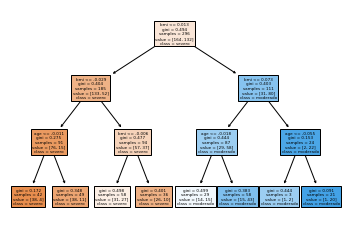

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

y = diabetes_data_df['deterioro']
X = diabetes_data_df[['age','sex','bmi']]

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Train model
clf = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

print( "La precisió és de {}".format( clf.score(X_test, y_test)) )

# plot tree
plot_tree(clf, filled=True, feature_names=X_test.columns, class_names=['severo','moderado'])
plt.savefig('tree.pdf')

---

### Optional Exercice

In this exercise, we will assume that we can only use 2 of the following variables to predict patient deterioration: `age`,` sex`, `bmi`,` bp`, `s1`,` s 2`, `s3`, `s4`,` s5`, `s6`.

Apply a *K-Nearest Neighbors* classifier to predict the patients' type according to its deterioration (severe or moderate progression) with only 2 variables. To find which pair of variables is the most relevant to acheiving better model performance, you will need to evaluate your classifier for each pair of variables.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from itertools import combinations

variables = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

tmp = []
for pair in combinations(variables, 2):         
        y = diabetes_data_df['deterioro']
        X = diabetes_data_df[[feat_1, feat_2]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

        kn = KNeighborsClassifier(n_neighbors=3)
        kn.fit(X_train, y_train)
        tmp.append([feat_1, feat_2, kn.score(X_test, y_test)])
            
tmp = np.array(tmp)
indice_mejor_rendimiento = np.argmax(tmp[:,2])
feat_1, feat_2, score = tmp[  indice_mejor_rendimiento ]

print("The features {} and {} obtain the better accuracy ({})".format(feat_1, feat_2, score))

The features bmi and s5 obtain the better accuracy (0.7602739726027398)
